In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=12, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.21.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
layer = tf.keras.layers.Dense(100)
layer = tf.keras.layers.Dense(100, input_shape=[None, 5])
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [3]:
# layer.variables
# x  * w + b
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 1.13292053e-01, -2.72256434e-02, -1.35742486e-01,
          7.84245133e-03,  7.85802156e-02, -1.84682101e-01,
         -2.33658642e-01,  8.58099312e-02,  4.62632924e-02,
         -5.02004623e-02, -9.56479460e-02, -3.93975675e-02,
          2.18234763e-01,  8.43286961e-02, -1.69373304e-02,
          1.17119744e-01, -2.27364287e-01, -1.65052116e-02,
         -9.05334949e-04, -2.16028437e-01, -1.07879773e-01,
          1.85022280e-01,  1.88538238e-01,  8.77775103e-02,
         -1.85592920e-02,  1.14331588e-01, -2.37621069e-01,
         -1.55450702e-01, -2.15154916e-01,  1.10046417e-02,
         -1.42247140e-01,  2.37682328e-01, -2.05071598e-01,
          1.96422085e-01,  2.24133238e-01,  8.80009085e-02,
         -1.83500290e-01, -1.41707212e-02, -1.53819799e-01,
          2.27520511e-01, -1.20986156e-01,  7.77297765e-02,
         -2.08389968e-01,  9.85053033e-02,  2.01942906e-01,
          1.74233243e-01, -1.3

In [4]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 |  (the

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [6]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [18]:
# tf.nn.softplus :log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5398901e-05 6.7153485e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [14]:
# customized dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建所需要的参数"""
        # x * w + b. input_Sjape:[None, a] w:[1, b] output_shape:[None, b]      
        self.kernel = self.add_weight(name = 'kernel',
                                     shape = (input_shape[1], self.units),
                                     initializer = 'uniform',
                                     trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                   shape = (self.units, ),
                                   initializer= 'zeros',
                                   trainable=True)
        
        
    def call(self, x):
        """完整正向计算"""
        return self.activation(x @ self.kernel + self.bias)
    

model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    # keras.layers.Dense(1, activation='softplus')     
    # keras.layers.Dense(1), keras.layers.Dense('spftplus'),    
]) 
model.summary()
model.compile(loss='mean_squared_error', optimizer = 'sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_4 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_5 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train_scaled, y_train, validation_data = (x_valid_scaled, y_valid), epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.0522 - val_loss: 0.6248
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5417 - val_loss: 0.5356
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4821 - val_loss: 0.5108
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4672 - val_loss: 0.4744
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4452 - val_loss: 0.4877
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4501 - val_loss: 0.4533
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4307 - val_loss: 0.4408
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4175 - val_loss: 0.4330
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4222 - val_loss: 0.4334
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4066 - val_lo

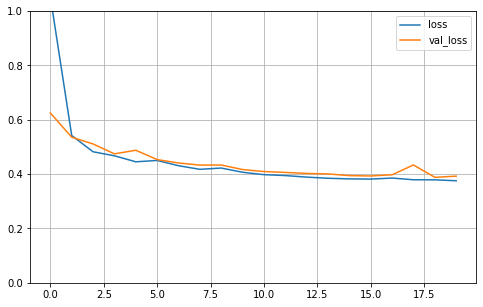

In [16]:
def plot_learning_curvres(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curvres(history)

In [17]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 756us/step - loss: 0.3946


0.3946301341056824